# **NOVA IMS - Information Management School** <br/>
# *Postgraduate Program Enterprise Data Science and Analytics* <br/>
Deep Learning Neural Networks <br/>
TP3 - Group 14 - February 2023<br/>

# 1. Load and import required packages and libraries:

In [ ]:
!pip3 install livelossplot==0.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from tensorflow.keras import Sequential, Model, Input, layers, initializers, regularizers, optimizers, metrics
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D

from tensorflow.keras.optimizers import schedules

import os
import time
import random 
import zipfile
from shutil import copyfile
from pathlib import Path


import numpy as np
import pandas as pd
import shutil
from PIL import Image

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
from google.colab import drive

import shutil
from collections import defaultdict
import json
from pathlib import Path
import os

from livelossplot.inputs.keras import PlotLossesCallback
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
pip freeze > requirements.txt

# 2. Load the data and perform the preprocessing:

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz 

--2023-02-04 09:18:38--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2023-02-04 09:18:39--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  18.6MB/s    in 4m 27s  

2023-02-04 09:23:07 (17.8 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [ ]:
!tar xzvf food-101.tar.gz

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/

In [ ]:
def split_dataset(root_food_path):
    data_paths = {
        'train': root_food_path/'meta/train.json',
        'test': root_food_path/'meta/test.json'
    }
    for data_type, meta_path in data_paths.items():
        os.makedirs(root_food_path/data_type, exist_ok=True)

        food_images = json.load(open(meta_path, 'r'))
        
        for food_name, image_paths in food_images.items():
            os.makedirs(root_food_path/data_type/food_name, exist_ok=True)
            
            for image_path in image_paths:
                image_path = image_path + '.jpg'
                shutil.move(root_food_path/'images'/image_path, root_food_path/data_type/image_path)

In [ ]:
download_dir = Path('/content/')

split_dataset(download_dir/'food-101')

Found 75750 files belonging to 101 classes.


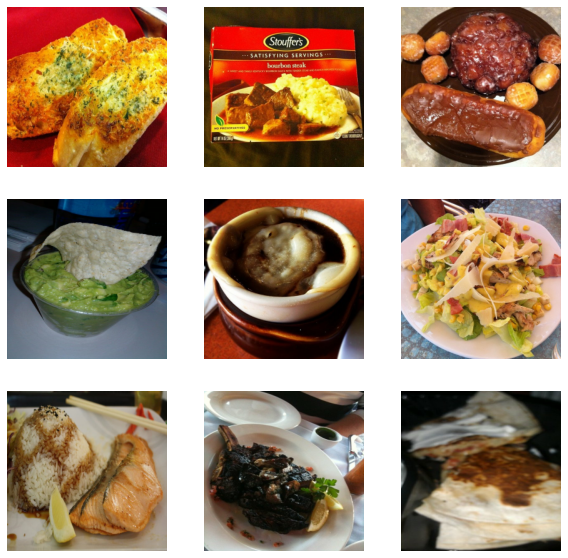

In [ ]:
#Function to see images in the train directory
data = tf.keras.preprocessing.image_dataset_from_directory(download_dir/'food-101/train')

def show_img(data):
    plt.figure(figsize=(10,10))
    for images, labels in data.take(1):
        for i in range(9): 
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

#Plotting the images in dataset
show_img(data)

Food 0 gnocchi
Food 1 beignets
Food 2 ravioli
Food 3 sushi
Food 4 peking_duck
Food 5 tacos
Food 6 ice_cream
Food 7 hamburger
Food 8 seaweed_salad
Food 9 beet_salad
Food 10 lobster_roll_sandwich
Food 11 macaroni_and_cheese
Food 12 bibimbap
Food 13 fried_calamari
Food 14 scallops
Food 15 waffles
Food 16 french_onion_soup
Food 17 club_sandwich
Food 18 cheese_plate
Food 19 french_fries
Food 20 oysters
Food 21 pho
Food 22 spaghetti_carbonara
Food 23 french_toast
Food 24 chocolate_mousse
Food 25 croque_madame
Food 26 chicken_curry
Food 27 edamame
Food 28 sashimi
Food 29 guacamole
Food 30 beef_carpaccio
Food 31 fish_and_chips
Food 32 shrimp_and_grits
Food 33 paella
Food 34 breakfast_burrito
Food 35 baby_back_ribs
Food 36 cannoli
Food 37 nachos
Food 38 hummus
Food 39 escargots
Food 40 omelette
Food 41 red_velvet_cake
Food 42 steak
Food 43 caprese_salad
Food 44 spring_rolls
Food 45 beef_tartare
Food 46 deviled_eggs
Food 47 bruschetta
Food 48 baklava
Food 49 onion_rings
Food 50 strawberry_shortc

<BarContainer object of 101 artists>

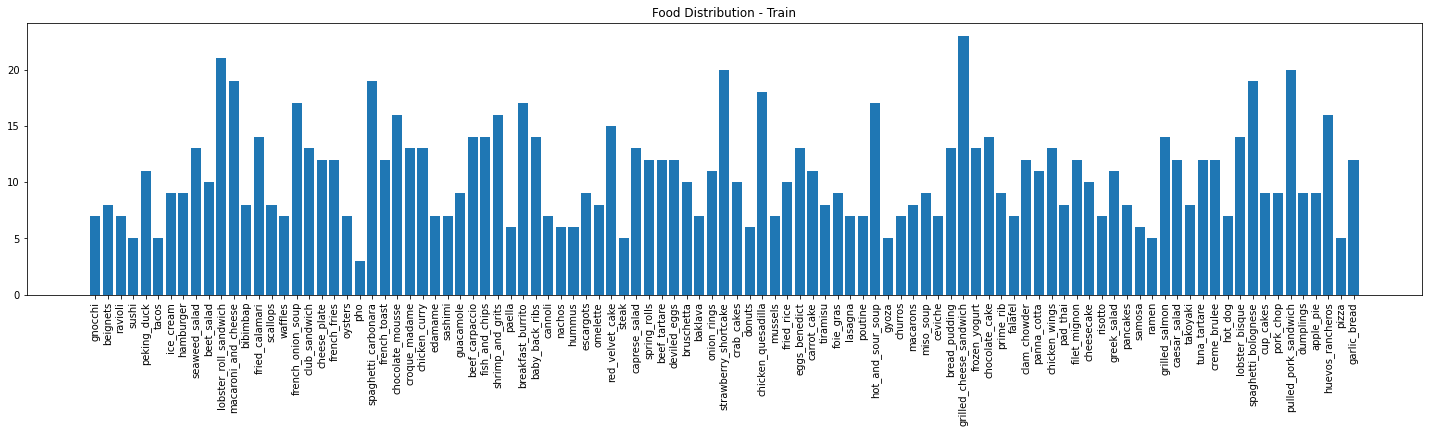

In [ ]:
#Distribution of images per class on the training data
label_names = os.listdir(download_dir/'food-101/train')

temp_plot=[]

n_labels = len(label_names)

for i in range(len(label_names)):
    print("Food",i,label_names[i])
    temp_plot.append([label_names[i],len(os.listdir(download_dir/'food-101/train')[i])])

plt.figure(figsize=(25,5)) 
plt.title("Food Distribution - Train")
plt.xticks(rotation = 90)
plt.bar(x=pd.DataFrame(temp_plot)[[0,1]][0],height=pd.DataFrame(temp_plot)[[0,1]][1])

In [ ]:
#We will consieder 10 classes of food to build and train the model (from the total of 101)
class_subset = sorted(os.listdir(download_dir/'food-101/images'))[:10]

Food 0 gnocchi
Food 1 beignets
Food 2 ravioli
Food 3 sushi
Food 4 peking_duck
Food 5 tacos
Food 6 ice_cream
Food 7 hamburger
Food 8 seaweed_salad
Food 9 beet_salad
Food 10 lobster_roll_sandwich
Food 11 macaroni_and_cheese
Food 12 bibimbap
Food 13 fried_calamari
Food 14 scallops
Food 15 waffles
Food 16 french_onion_soup
Food 17 club_sandwich
Food 18 cheese_plate
Food 19 french_fries
Food 20 oysters
Food 21 pho
Food 22 spaghetti_carbonara
Food 23 french_toast
Food 24 chocolate_mousse
Food 25 croque_madame
Food 26 chicken_curry
Food 27 edamame
Food 28 sashimi
Food 29 guacamole
Food 30 beef_carpaccio
Food 31 fish_and_chips
Food 32 shrimp_and_grits
Food 33 paella
Food 34 breakfast_burrito
Food 35 baby_back_ribs
Food 36 cannoli
Food 37 nachos
Food 38 hummus
Food 39 escargots
Food 40 omelette
Food 41 red_velvet_cake
Food 42 steak
Food 43 caprese_salad
Food 44 spring_rolls
Food 45 beef_tartare
Food 46 deviled_eggs
Food 47 bruschetta
Food 48 baklava
Food 49 onion_rings
Food 50 strawberry_shortc

<BarContainer object of 101 artists>

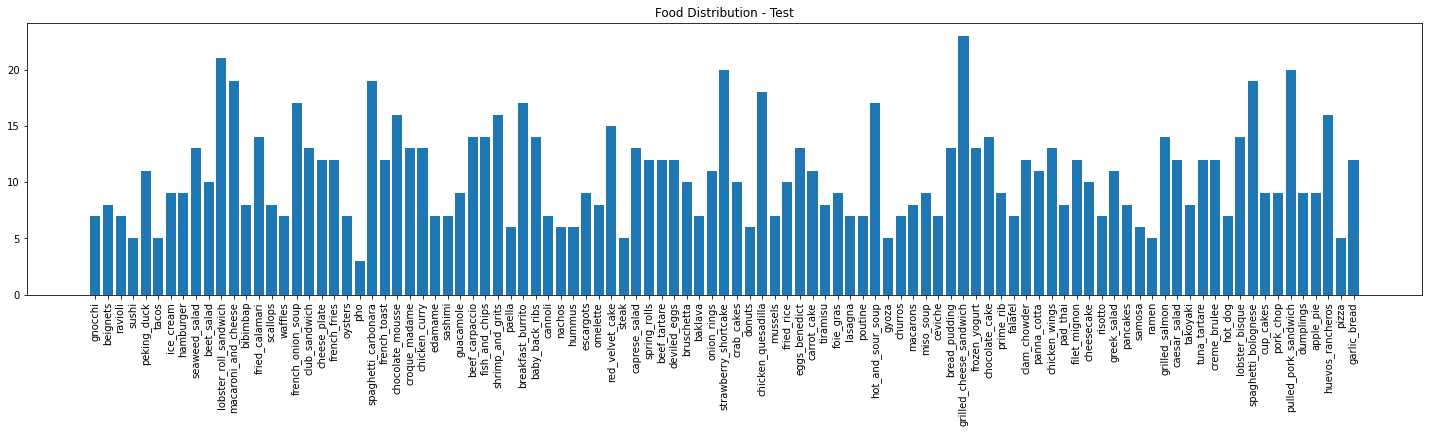

In [ ]:
#Distribution of images per class on the test data
label_names = os.listdir(download_dir/'food-101/test')

temp_plot=[]

n_labels = len(label_names)

for i in range(len(label_names)):
    print("Food",i,label_names[i])
    temp_plot.append([label_names[i],len(os.listdir(download_dir/'food-101/test')[i])])

plt.figure(figsize=(25,5)) 
plt.title("Food Distribution - Test")
plt.xticks(rotation = 90)
plt.bar(x=pd.DataFrame(temp_plot)[[0,1]][0],height=pd.DataFrame(temp_plot)[[0,1]][1])

### **2.1 Data augmentation:**

In [ ]:
BATCH_SIZE = 64

train_generator = ImageDataGenerator(rotation_range=90, 
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing


from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale=1/255.,              # normalize pixel values between 0-1
    brightness_range=[0.1, 0.7], # specify the range in which to decrease/increase brightness
    width_shift_range=0.5,       # shift the width of the image 50%
    rotation_range=90,           # random rotation by 90 degrees
    horizontal_flip=True,        # 180 degree flip horizontally
    vertical_flip=True,          # 180 degree flip vertically
    validation_split=0.15        # 15% of the data will be used for validation at end of each epoch
)

In [ ]:
train_data_dir = download_dir/'food-101/train'
test_data_dir = download_dir/'food-101/test'

class_subset = sorted(os.listdir(download_dir/'food-101/images'))[:10] # Using only the first 10 classes

traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 6380 images belonging to 10 classes.
Found 1120 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#Check the chosen 10 food classes
print("Classes:", traingen.class_indices)
print("Classes:", validgen.class_indices)
print("Classes:", testgen.class_indices)

Classes: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9}
Classes: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9}
Classes: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9}


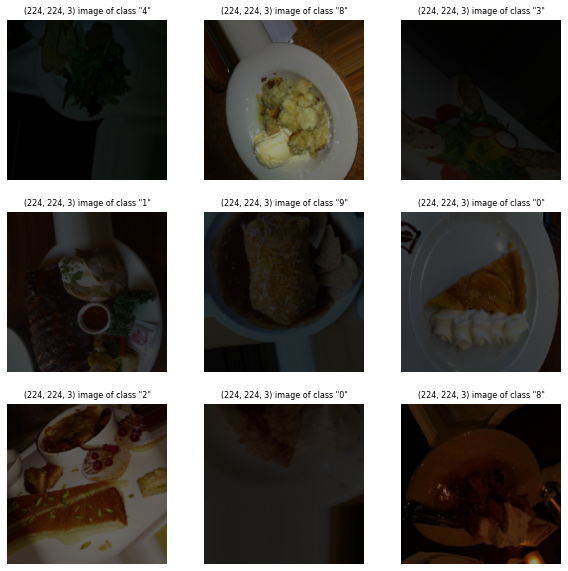

In [ ]:
#check some examples of images in the train dataset
def show_sample_batch(ds, grid_size=(3, 3)):
    n_images = grid_size[0]*grid_size[1]
    # Get a batch via iteration
    batch_x, batch_y = traingen.next()
    batch_x, batch_y = batch_x[0:n_images], batch_y[0:n_images]
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i, (img, y) in enumerate(zip(batch_x, batch_y)):
        ax = plt.subplot(grid_size[0], grid_size[1],  i + 1)
        plt.imshow(img)
        plt.title("{} image of class \"{}\"".format(img.shape,np.argmax(y,axis=-1)), size=8)
        plt.axis("off")

show_sample_batch(traingen)

# 3. Model Creation and Tuning:

### **3.1 VGG16 model:**


### 3.1.1 Function to create the model:

In [ ]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=10

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 5

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_model.trainable = False

In [ ]:
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True,
                           mode='min')

### 3.1.2 Training of the model:

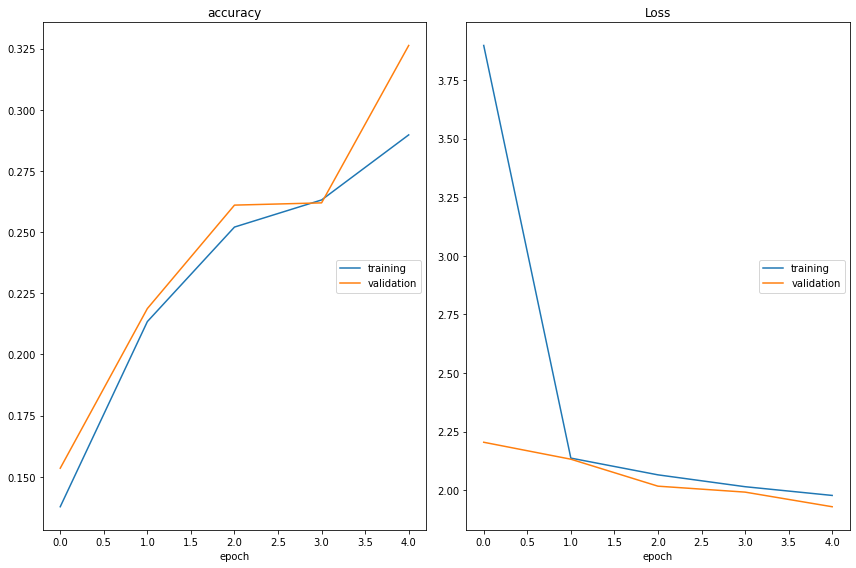

accuracy
	training         	 (min:    0.138, max:    0.290, cur:    0.290)
	validation       	 (min:    0.153, max:    0.326, cur:    0.326)
Loss
	training         	 (min:    1.978, max:    3.898, cur:    1.978)
	validation       	 (min:    1.930, max:    2.205, cur:    1.930)
99/99 [==============================] - 3958s 40s/step - loss: 1.9780 - accuracy: 0.2897 - val_loss: 1.9297 - val_accuracy: 0.3263
CPU times: user 9h 25min 32s, sys: 1min 12s, total: 9h 26min 44s
Wall time: 5h 31min 3s


In [ ]:
%%time 

vgg_history = vgg_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

### 3.1.3 Applying the model on unseen data:

In [ ]:
# Generate predictions
vgg_model.load_weights('tl_model_v1.weights.best.hdf5') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = vgg_model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

2500/2500 [==============================] - 1451s 580ms/step


In [ ]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 23.88%
